In [2]:
# Import all required packages

import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

In [4]:
print(train.head())
print(test.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
             Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways

In [5]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(10683, 12) (2671, 11) (13354, 12)


In [6]:
# Checking our new dataset
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price source  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  train  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  train  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  train  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  train

In [7]:
df['Price'].isnull().sum()

2671

In [8]:
df.tail()

Airline Date_of_Journey   Source Destination  \
13349          Air India       6/06/2019  Kolkata    Banglore   
13350             IndiGo      27/03/2019  Kolkata    Banglore   
13351        Jet Airways       6/03/2019    Delhi      Cochin   
13352          Air India       6/03/2019    Delhi      Cochin   
13353  Multiple carriers      15/06/2019    Delhi      Cochin   

                 Route Dep_Time  Arrival_Time Duration Total_Stops  \
13349  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
13350        CCU → BLR    14:20         16:55   2h 35m    non-stop   
13351  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
13352  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
13353  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

      Additional_Info  Price source  
13349         No info    NaN   test  
13350         No info    NaN   test  
13351         No info    NaN   test  
13352         No info    NaN   test  
13353         No info    NaN   test

In [9]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [10]:
#checking null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [11]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
dtype: object

In [12]:
#Checking columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'source'],
      dtype='object')

In [13]:
# Checking unique values
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [14]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Converting the Date_of_journey into date, month and year

In [15]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [16]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price source  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  train   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  train   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  train   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  train   

   year  month  day  
0  2019      3   24  
1  2019      1    5  
2  2019      9    6  
3  2019     12    5  
4  2019      1    3

In [17]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

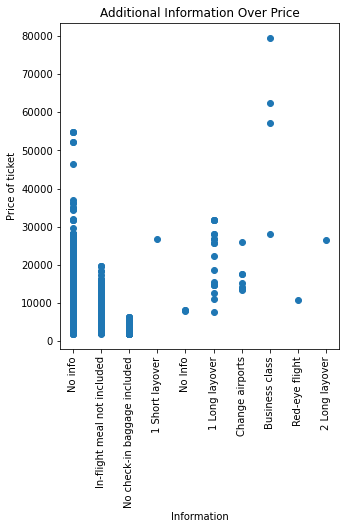

In [18]:
# scatter plot for additional info over Price
plt.figure(figsize = (5, 6))
plt.title('Additional Information Over Price')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.show()

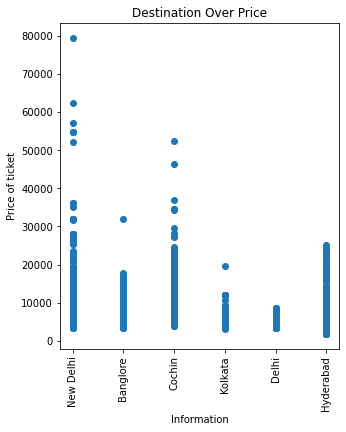

In [19]:
# scatter plot for Destination over price
plt.figure(figsize = (5, 6))
plt.title('Destination Over Price')
plt.scatter(df['Destination'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.show()

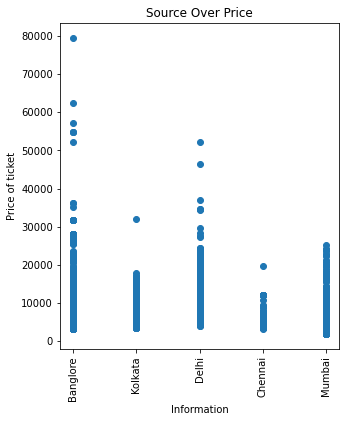

In [20]:
# scatter plot for Source over price
plt.figure(figsize = (5, 6))
plt.title('Source Over Price')
plt.scatter(df['Source'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.show()

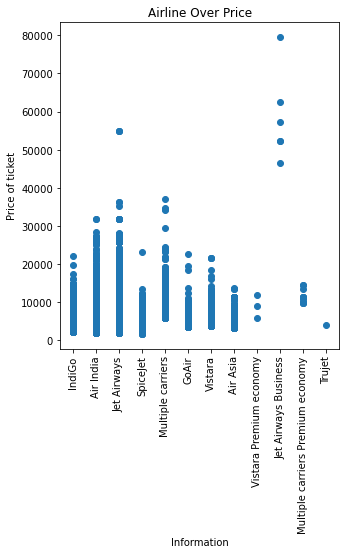

In [21]:
# scatter plot for Airline over price
plt.figure(figsize = (5, 6))
plt.title('Airline Over Price')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.show()

In [22]:
df['Dep_Time'].head()

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [23]:
# Now We will split DEP_TIME into 2 different columns
df['Dep_hrs'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [24]:
# We will remove Dep_Time column
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [25]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

   Arrival_Time Duration Total_Stops Additional_Info    Price source  year  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train  2019   
1         13:15   7h 25m     2 stops         No info   7662.0  train  2019   
2  04:25 10 Jun      19h     2 stops         No info  13882.0  train  2019   
3         23:30   5h 25m      1 stop         No info   6218.0  train  2019   
4         21:35   4h 45m      1 stop         No info  13302.0  train  2019   

   month  day  Dep_hrs  Dep_min  
0      3   24       22       20  
1      1    5        5       50  
2      9    6        9       25  
3     12    5       18        5  
4      1    3       16       50

In [26]:
# We will remove Date of Journey column
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [27]:
df.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info    Price source  year  month  day  \
0   2h 50m    non-stop         No info   3897.0  train  2019      3   24   
1   7h 25m     2 stops         No info   7662.0  train  2019      1    5   
2      19h     2 stops         No info  13882.0  train  2019      9    6   
3   5h 25m      1 stop         No info   6218.0  train  2019     12    5   
4   4h 45m      1 stop         No info  13302.0  train  2019      1    3   

   Dep_hrs  Dep_min  
0       22       20  
1        5       50  
2        9       25  
3       18        5  
4       16       50

In [28]:
# Now We will split Arrival_Time into 2 different columns
df['Arv_hrs'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arv_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [29]:
# We will remove Arrival time column
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [30]:
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info    Price source  year  month  day  Dep_hrs  \
0    non-stop         No info   3897.0  train  2019      3   24       22   
1     2 stops         No info   7662.0  train  2019      1    5        5   
2     2 stops         No info  13882.0  train  2019      9    6        9   
3      1 stop         No info   6218.0  train  2019     12    5       18   
4      1 stop         No info  13302.0  train  2019      1    3       16   

   Dep_min  Arv_hrs  Arv_min  
0       20        1       10  
1       50       13       15  
2       25        4       25  
3        5       23       30  
4       50       21       35

In [31]:
# We will seprate duration column
duration = df["Duration"]

In [32]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]   

dur_hrs = []
dur_min = []
for i in range(len(duration)):
    dur_hrs.append(int(duration[i].split(sep = "h")[0]))
    dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [33]:
df["Dur_hrs"] = dur_hrs
df["Dur_min"] = dur_min

In [34]:
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info    Price source  year  month  day  Dep_hrs  \
0    non-stop         No info   3897.0  train  2019      3   24       22   
1     2 stops         No info   7662.0  train  2019      1    5        5   
2     2 stops         No info  13882.0  train  2019      9    6        9   
3      1 stop         No info   6218.0  train  2019     12    5       18   
4      1 stop         No info  13302.0  train  2019      1    3       16   

   Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
0       20        1       10        2       50  
1       50       13       15        7       25  
2       25        4       25       19        0  
3        5       23       30        5       25  
4       50       21       35        4       45

In [35]:
df.drop(["Duration"], axis = 1, inplace = True)

In [36]:
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info    Price source  year  month  day  Dep_hrs  Dep_min  \
0         No info   3897.0  train  2019      3   24       22       20   
1         No info   7662.0  train  2019      1    5        5       50   
2         No info  13882.0  train  2019      9    6        9       25   
3         No info   6218.0  train  2019     12    5       18        5   
4         No info  13302.0  train  2019      1    3       16       50   

   Arv_hrs  Arv_min  Dur_hrs  Dur_min  
0        1       10        2       50  
1       13       15        7       25  
2        4       25       19        0  
3       23       30        5       25  
4       21       35        4       45

In [37]:
#We will drop Route and Additional information column
df.drop(["Route"],axis =1 , inplace=True)

In [38]:
df.drop(["Additional_Info"],axis =1 , inplace=True)

In [39]:
df.head()

Airline    Source Destination Total_Stops    Price source  year  month  \
0       IndiGo  Banglore   New Delhi    non-stop   3897.0  train  2019      3   
1    Air India   Kolkata    Banglore     2 stops   7662.0  train  2019      1   
2  Jet Airways     Delhi      Cochin     2 stops  13882.0  train  2019      9   
3       IndiGo   Kolkata    Banglore      1 stop   6218.0  train  2019     12   
4       IndiGo  Banglore   New Delhi      1 stop  13302.0  train  2019      1   

   day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
0   24       22       20        1       10        2       50  
1    5        5       50       13       15        7       25  
2    6        9       25        4       25       19        0  
3    5       18        5       23       30        5       25  
4    3       16       50       21       35        4       45

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [41]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

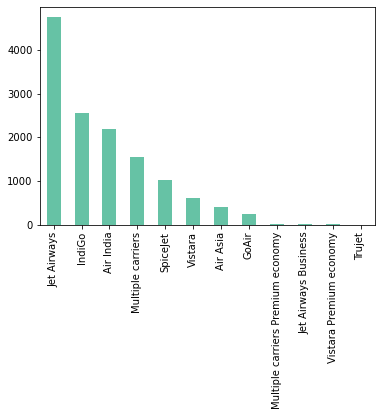

In [42]:
df['Airline'].value_counts().plot.bar(cmap='Set2')

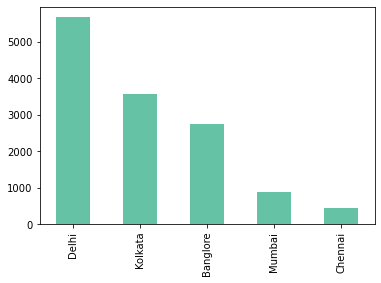

In [43]:
 df['Source'].value_counts().plot.bar(cmap='Set2')

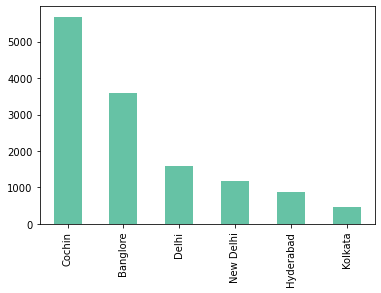

In [44]:
df['Destination'].value_counts().plot.bar(cmap='Set2')

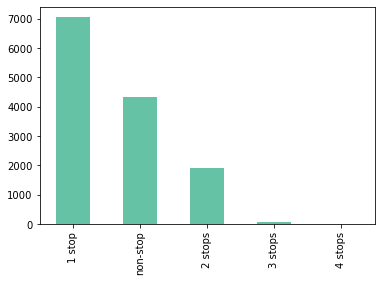

In [45]:
df['Total_Stops'].value_counts().plot.bar(cmap='Set2')

In [46]:
#Divide into test and train:
df_train = df.loc[df['source']=="train"]

In [47]:
df_test = df.loc[df['source']=="test"]

In [48]:
df_train.head()

Airline    Source Destination Total_Stops    Price source  year  month  \
0       IndiGo  Banglore   New Delhi    non-stop   3897.0  train  2019      3   
1    Air India   Kolkata    Banglore     2 stops   7662.0  train  2019      1   
2  Jet Airways     Delhi      Cochin     2 stops  13882.0  train  2019      9   
3       IndiGo   Kolkata    Banglore      1 stop   6218.0  train  2019     12   
4       IndiGo  Banglore   New Delhi      1 stop  13302.0  train  2019      1   

   day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
0   24       22       20        1       10        2       50  
1    5        5       50       13       15        7       25  
2    6        9       25        4       25       19        0  
3    5       18        5       23       30        5       25  
4    3       16       50       21       35        4       45

In [49]:
df_test.head()

Airline    Source Destination Total_Stops  Price source  \
10683        Jet Airways     Delhi      Cochin      1 stop    NaN   test   
10684             IndiGo   Kolkata    Banglore      1 stop    NaN   test   
10685        Jet Airways     Delhi      Cochin      1 stop    NaN   test   
10686  Multiple carriers     Delhi      Cochin      1 stop    NaN   test   
10687           Air Asia  Banglore       Delhi    non-stop    NaN   test   

       year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
10683  2019      6    6       17       30        4       25       10       55  
10684  2019     12    5        6       20       10       20        4        0  
10685  2019      5   21       19       15       19        0       23       45  
10686  2019      5   21        8        0       21        0       13        0  
10687  2019      6   24       23       55        2       45        2       50

In [50]:
df_test.drop(["Price"],axis =1 , inplace=True)

In [51]:
df_test.head()

Airline    Source Destination Total_Stops source  year  \
10683        Jet Airways     Delhi      Cochin      1 stop   test  2019   
10684             IndiGo   Kolkata    Banglore      1 stop   test  2019   
10685        Jet Airways     Delhi      Cochin      1 stop   test  2019   
10686  Multiple carriers     Delhi      Cochin      1 stop   test  2019   
10687           Air Asia  Banglore       Delhi    non-stop   test  2019   

       month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
10683      6    6       17       30        4       25       10       55  
10684     12    5        6       20       10       20        4        0  
10685      5   21       19       15       19        0       23       45  
10686      5   21        8        0       21        0       13        0  
10687      6   24       23       55        2       45        2       50

In [52]:
df_test.drop(["source"],axis =1 , inplace=True)

In [53]:
df_train.drop(["source"],axis =1 , inplace=True)

In [54]:
df_train.head()

Airline    Source Destination Total_Stops    Price  year  month  day  \
0       IndiGo  Banglore   New Delhi    non-stop   3897.0  2019      3   24   
1    Air India   Kolkata    Banglore     2 stops   7662.0  2019      1    5   
2  Jet Airways     Delhi      Cochin     2 stops  13882.0  2019      9    6   
3       IndiGo   Kolkata    Banglore      1 stop   6218.0  2019     12    5   
4       IndiGo  Banglore   New Delhi      1 stop  13302.0  2019      1    3   

   Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
0       22       20        1       10        2       50  
1        5       50       13       15        7       25  
2        9       25        4       25       19        0  
3       18        5       23       30        5       25  
4       16       50       21       35        4       45

In [55]:
df_test.head()

Airline    Source Destination Total_Stops  year  month  day  \
10683        Jet Airways     Delhi      Cochin      1 stop  2019      6    6   
10684             IndiGo   Kolkata    Banglore      1 stop  2019     12    5   
10685        Jet Airways     Delhi      Cochin      1 stop  2019      5   21   
10686  Multiple carriers     Delhi      Cochin      1 stop  2019      5   21   
10687           Air Asia  Banglore       Delhi    non-stop  2019      6   24   

       Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  Dur_min  
10683       17       30        4       25       10       55  
10684        6       20       10       20        4        0  
10685       19       15       19        0       23       45  
10686        8        0       21        0       13        0  
10687       23       55        2       45        2       50

In [56]:
df_train.shape

(10683, 14)

In [57]:
df_test.shape

(2671, 13)

We will convert our Object column into numerial column using encoding method

In [58]:
#One Hot Coding:
df_train=pd.get_dummies(df_train,columns=['Airline','Source','Destination'])

In [59]:
df_train.head()

Total_Stops    Price  year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  \
0    non-stop   3897.0  2019      3   24       22       20        1       10   
1     2 stops   7662.0  2019      1    5        5       50       13       15   
2     2 stops  13882.0  2019      9    6        9       25        4       25   
3      1 stop   6218.0  2019     12    5       18        5       23       30   
4      1 stop  13302.0  2019      1    3       16       50       21       35   

   Dur_hrs  ...  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0        2  ...               0             0               0              0   
1        7  ...               0             0               1              0   
2       19  ...               0             1               0              0   
3        5  ...               0             0               1              0   
4        4  ...               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 34 columns]

In [60]:
df_test=pd.get_dummies(df_test,columns=['Airline','Source','Destination'])

In [61]:
df_test.head()

Total_Stops  year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  \
10683      1 stop  2019      6    6       17       30        4       25   
10684      1 stop  2019     12    5        6       20       10       20   
10685      1 stop  2019      5   21       19       15       19        0   
10686      1 stop  2019      5   21        8        0       21        0   
10687    non-stop  2019      6   24       23       55        2       45   

       Dur_hrs  Dur_min  ...  Source_Chennai  Source_Delhi  Source_Kolkata  \
10683       10       55  ...               0             1               0   
10684        4        0  ...               0             0               1   
10685       23       45  ...               0             1               0   
10686       13        0  ...               0             1               0   
10687        2       50  ...               0             0               0   

       Source_Mumbai  Destination_Banglore  Destination_Cochin  \
10683              0                     0                   1   
10684              0                     1                   0   
10685              0                     0                   1   
10686              0                     0                   1   
10687              0                     0                   0   

       Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
10683                  0                      0                    0   
10684                  0                      0                    0   
10685                  0                      0                    0   
10686                  0                      0                    0   
10687                  1                      0                    0   

       Destination_New Delhi  
10683                      0  
10684                      0  
10685                      0  
10686                      0  
10687                      0  

[5 rows x 32 columns]

In [62]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [63]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [64]:
df_train.head()

Total_Stops    Price  year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  \
0          0.0   3897.0  2019      3   24       22       20        1       10   
1          2.0   7662.0  2019      1    5        5       50       13       15   
2          2.0  13882.0  2019      9    6        9       25        4       25   
3          1.0   6218.0  2019     12    5       18        5       23       30   
4          1.0  13302.0  2019      1    3       16       50       21       35   

   Dur_hrs  ...  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0        2  ...               0             0               0              0   
1        7  ...               0             0               1              0   
2       19  ...               0             1               0              0   
3        5  ...               0             0               1              0   
4        4  ...               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 34 columns]

In [65]:
#Removing null values
df_train.isnull().sum()

Total_Stops                                  1
Price                                        0
year                                         0
month                                        0
day                                          0
Dep_hrs                                      0
Dep_min                                      0
Arv_hrs                                      0
Arv_min                                      0
Dur_hrs                                      0
Dur_min                                      0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

In [66]:
df_train = df_train.replace(np.nan, 0)

In [67]:
df_train.isnull().sum()

Total_Stops                                  0
Price                                        0
year                                         0
month                                        0
day                                          0
Dep_hrs                                      0
Dep_min                                      0
Arv_hrs                                      0
Arv_min                                      0
Dur_hrs                                      0
Dur_min                                      0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

In [68]:
df_test.head()

Total_Stops  year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  \
10683            1  2019      6    6       17       30        4       25   
10684            1  2019     12    5        6       20       10       20   
10685            1  2019      5   21       19       15       19        0   
10686            1  2019      5   21        8        0       21        0   
10687            0  2019      6   24       23       55        2       45   

       Dur_hrs  Dur_min  ...  Source_Chennai  Source_Delhi  Source_Kolkata  \
10683       10       55  ...               0             1               0   
10684        4        0  ...               0             0               1   
10685       23       45  ...               0             1               0   
10686       13        0  ...               0             1               0   
10687        2       50  ...               0             0               0   

       Source_Mumbai  Destination_Banglore  Destination_Cochin  \
10683              0                     0                   1   
10684              0                     1                   0   
10685              0                     0                   1   
10686              0                     0                   1   
10687              0                     0                   0   

       Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
10683                  0                      0                    0   
10684                  0                      0                    0   
10685                  0                      0                    0   
10686                  0                      0                    0   
10687                  1                      0                    0   

       Destination_New Delhi  
10683                      0  
10684                      0  
10685                      0  
10686                      0  
10687                      0  

[5 rows x 32 columns]

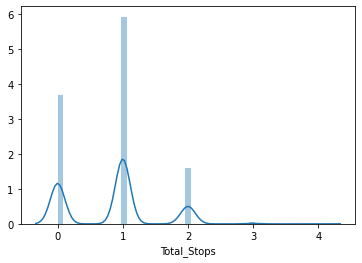

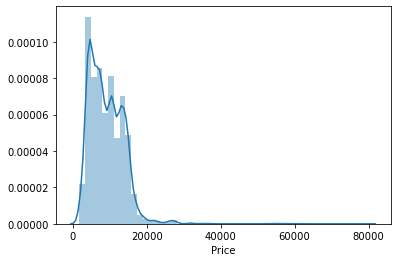

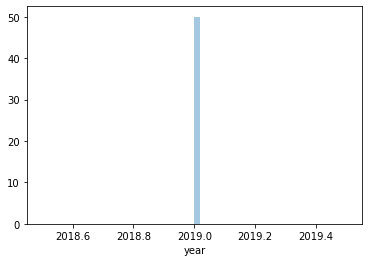

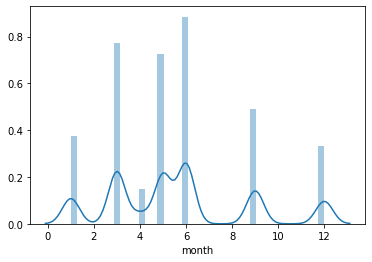

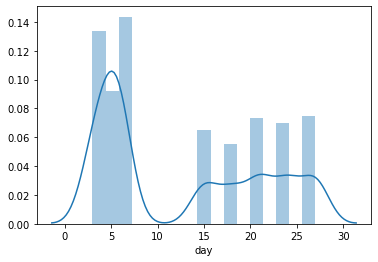

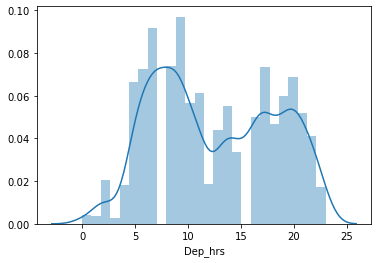

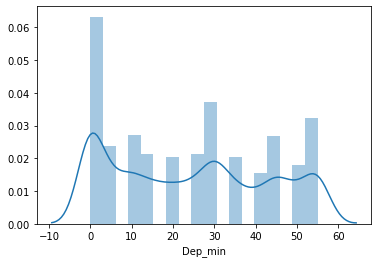

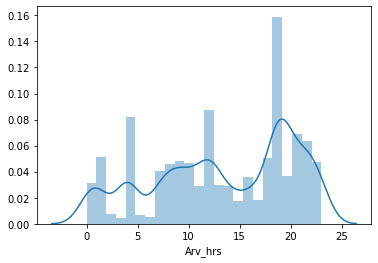

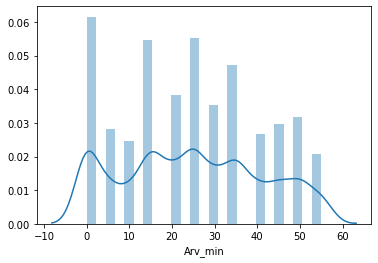

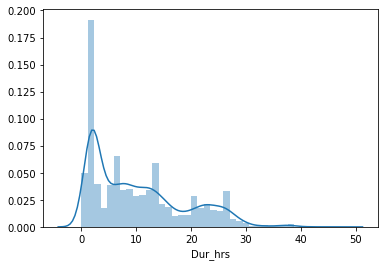

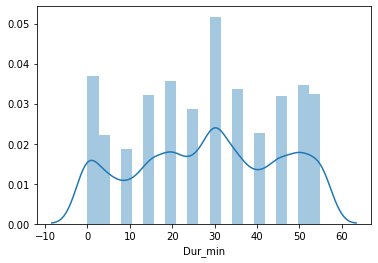

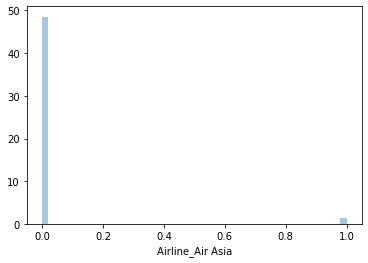

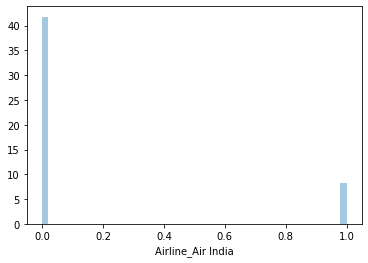

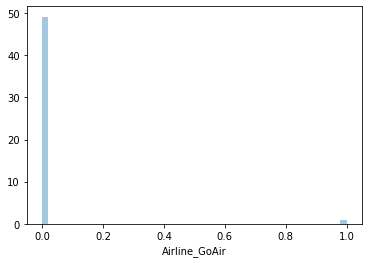

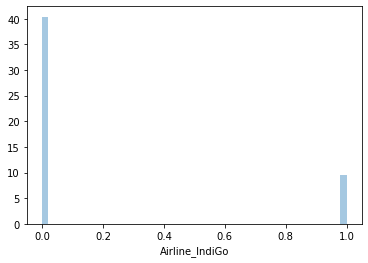

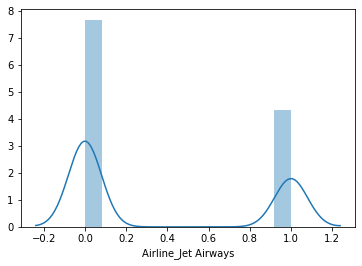

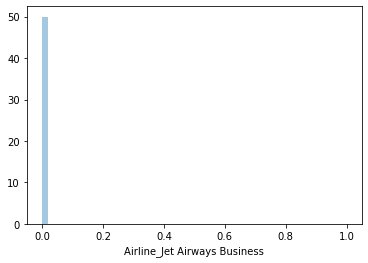

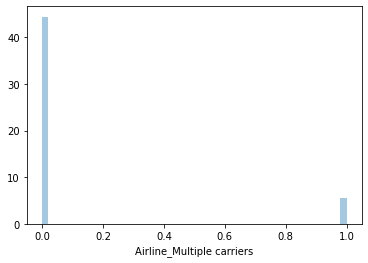

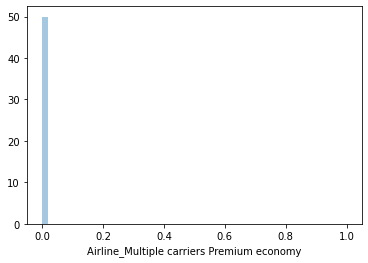

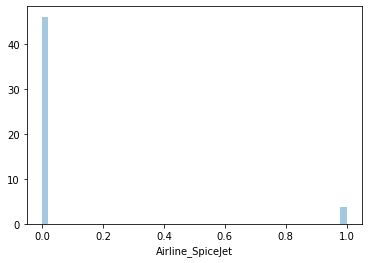

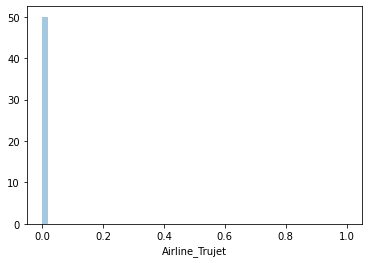

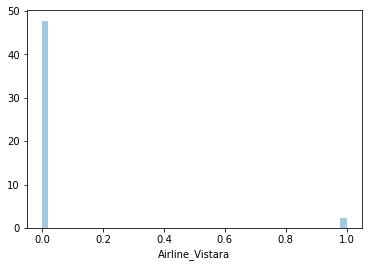

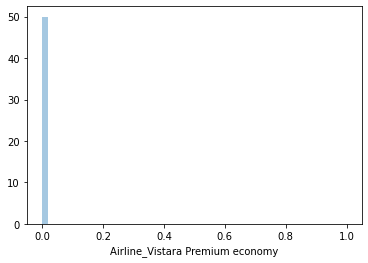

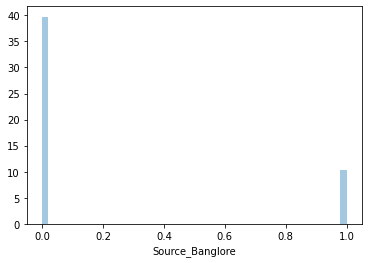

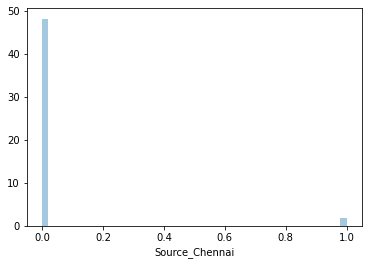

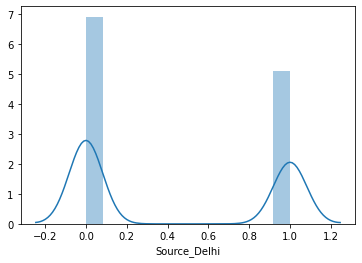

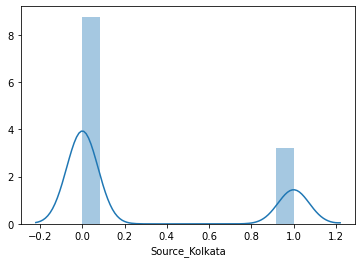

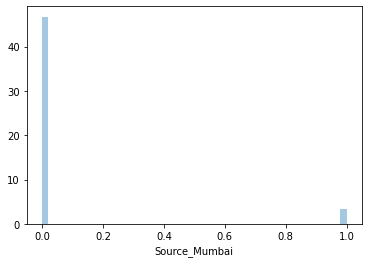

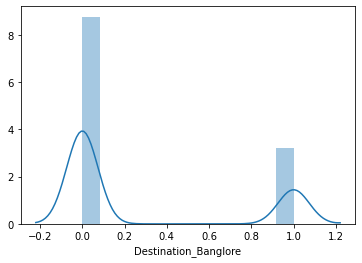

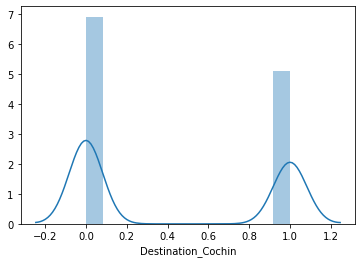

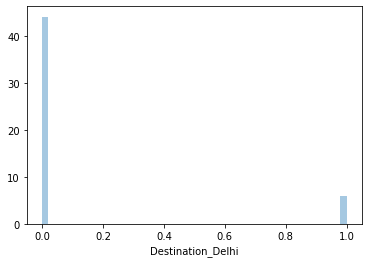

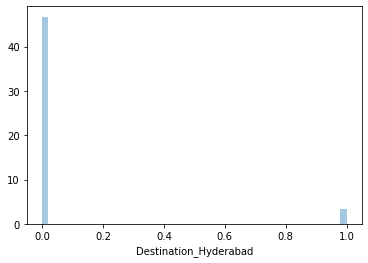

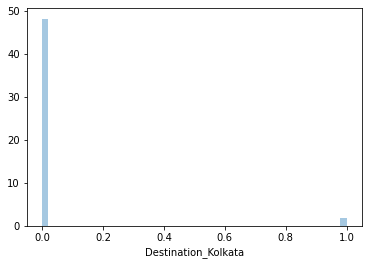

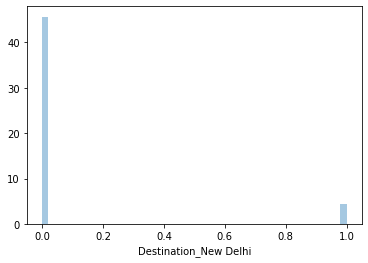

In [69]:
for i in df_train.columns:
    plt.figure()
    sb.distplot(df_train[i])

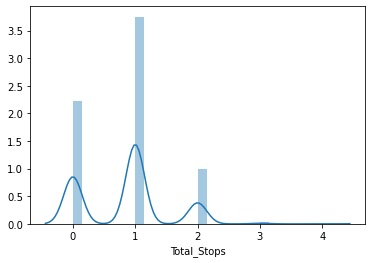

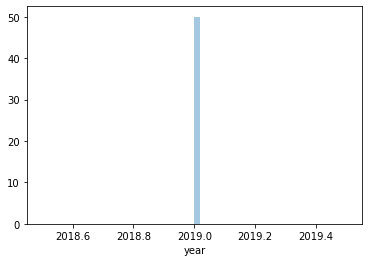

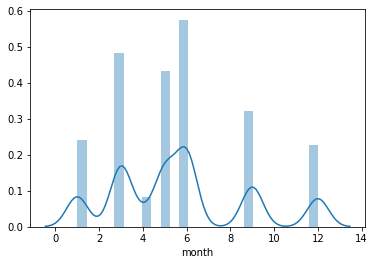

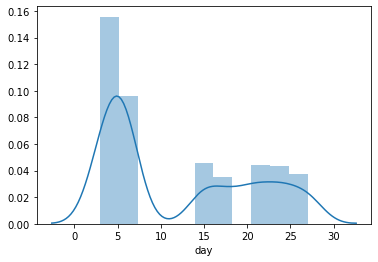

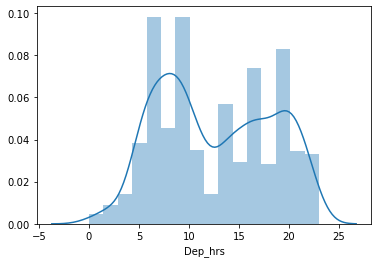

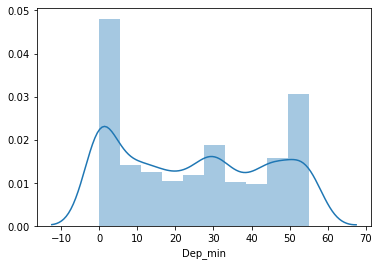

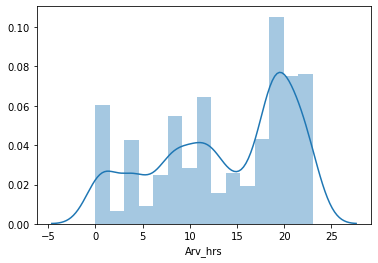

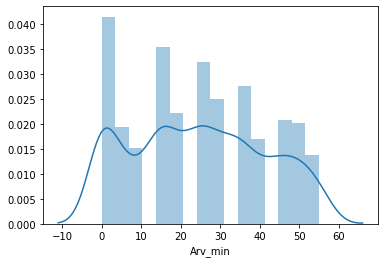

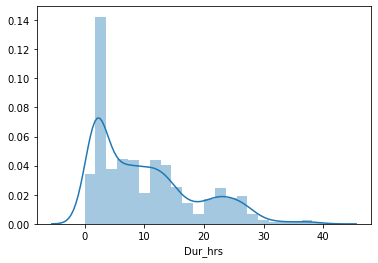

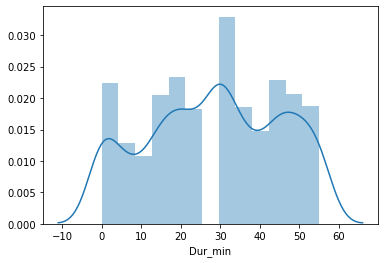

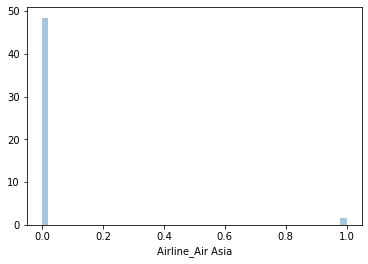

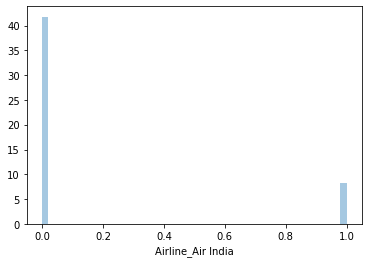

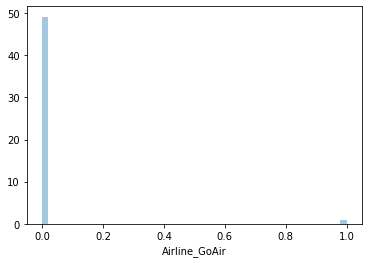

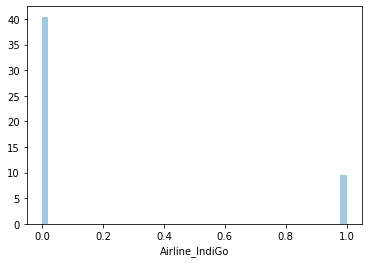

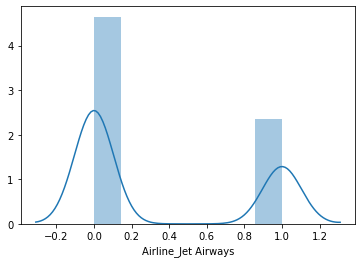

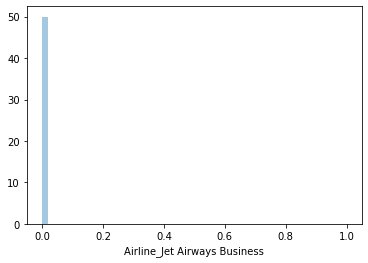

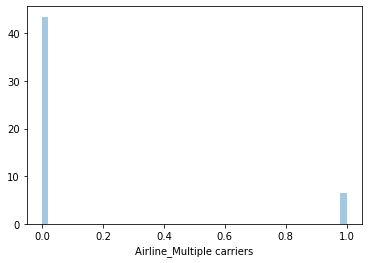

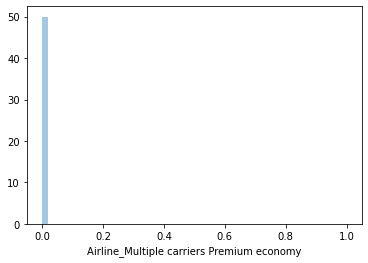

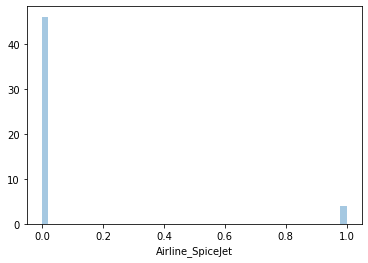

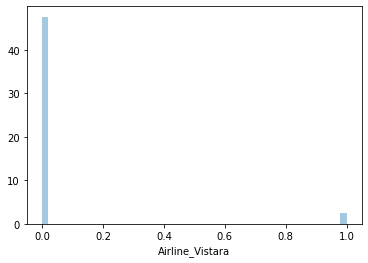

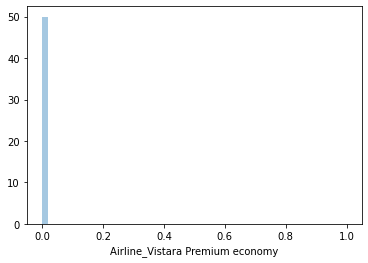

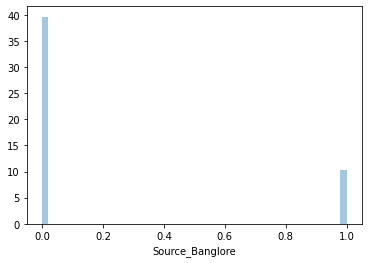

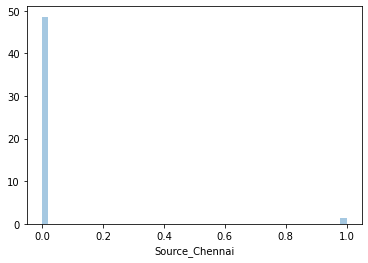

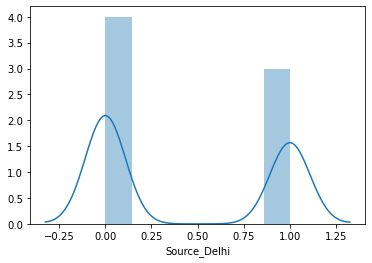

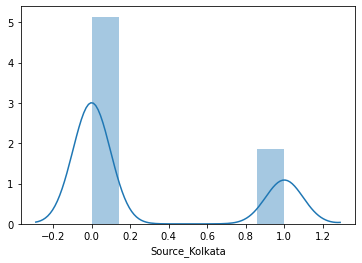

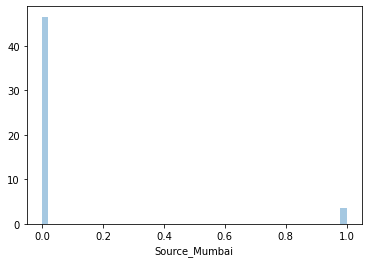

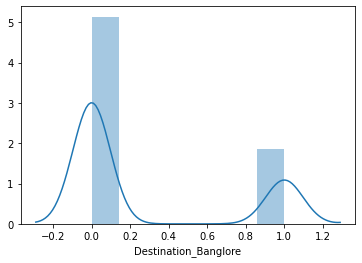

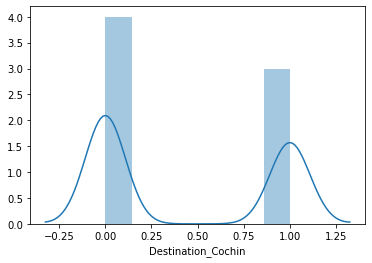

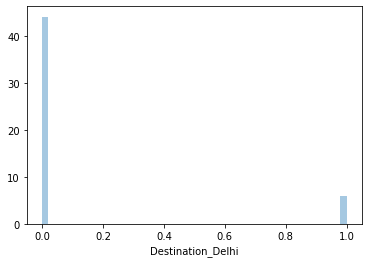

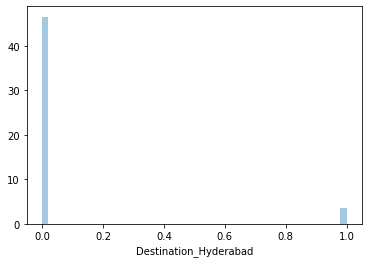

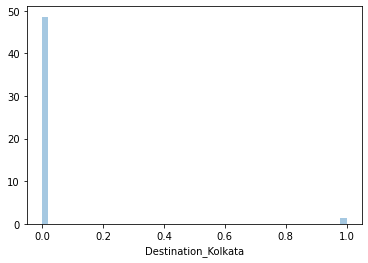

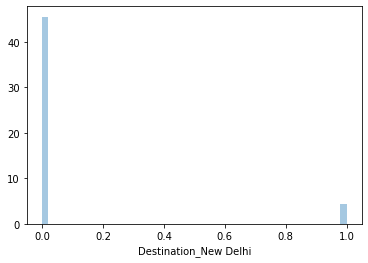

In [70]:
for j in df_test.columns:
    plt.figure()
    sb.distplot(df_test[j])

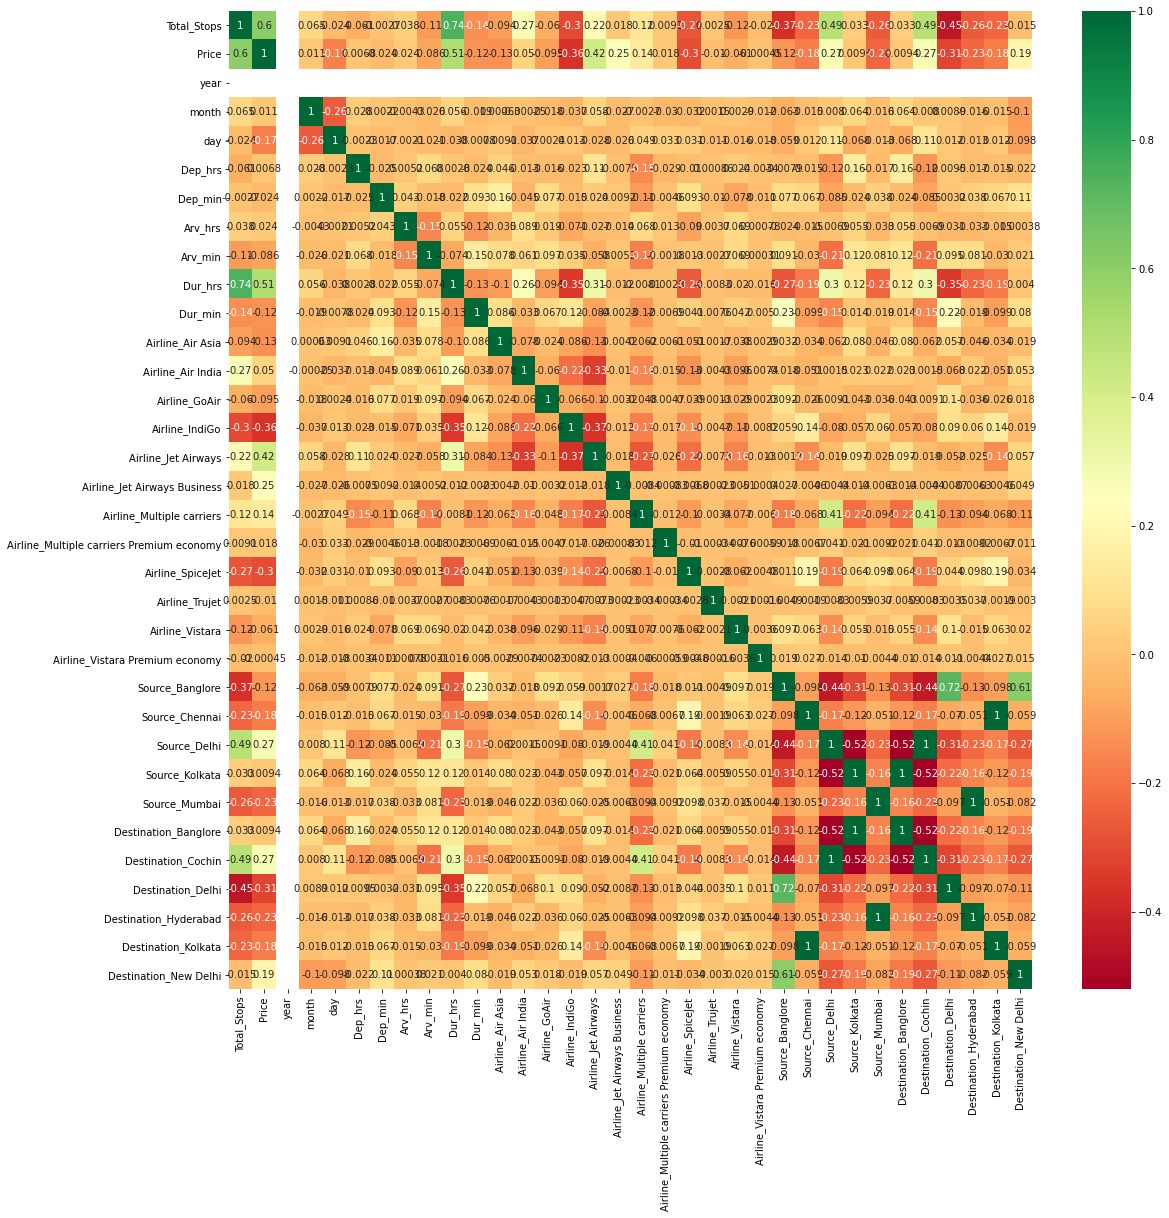

In [71]:
plt.figure(figsize = (18,18))
sb.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

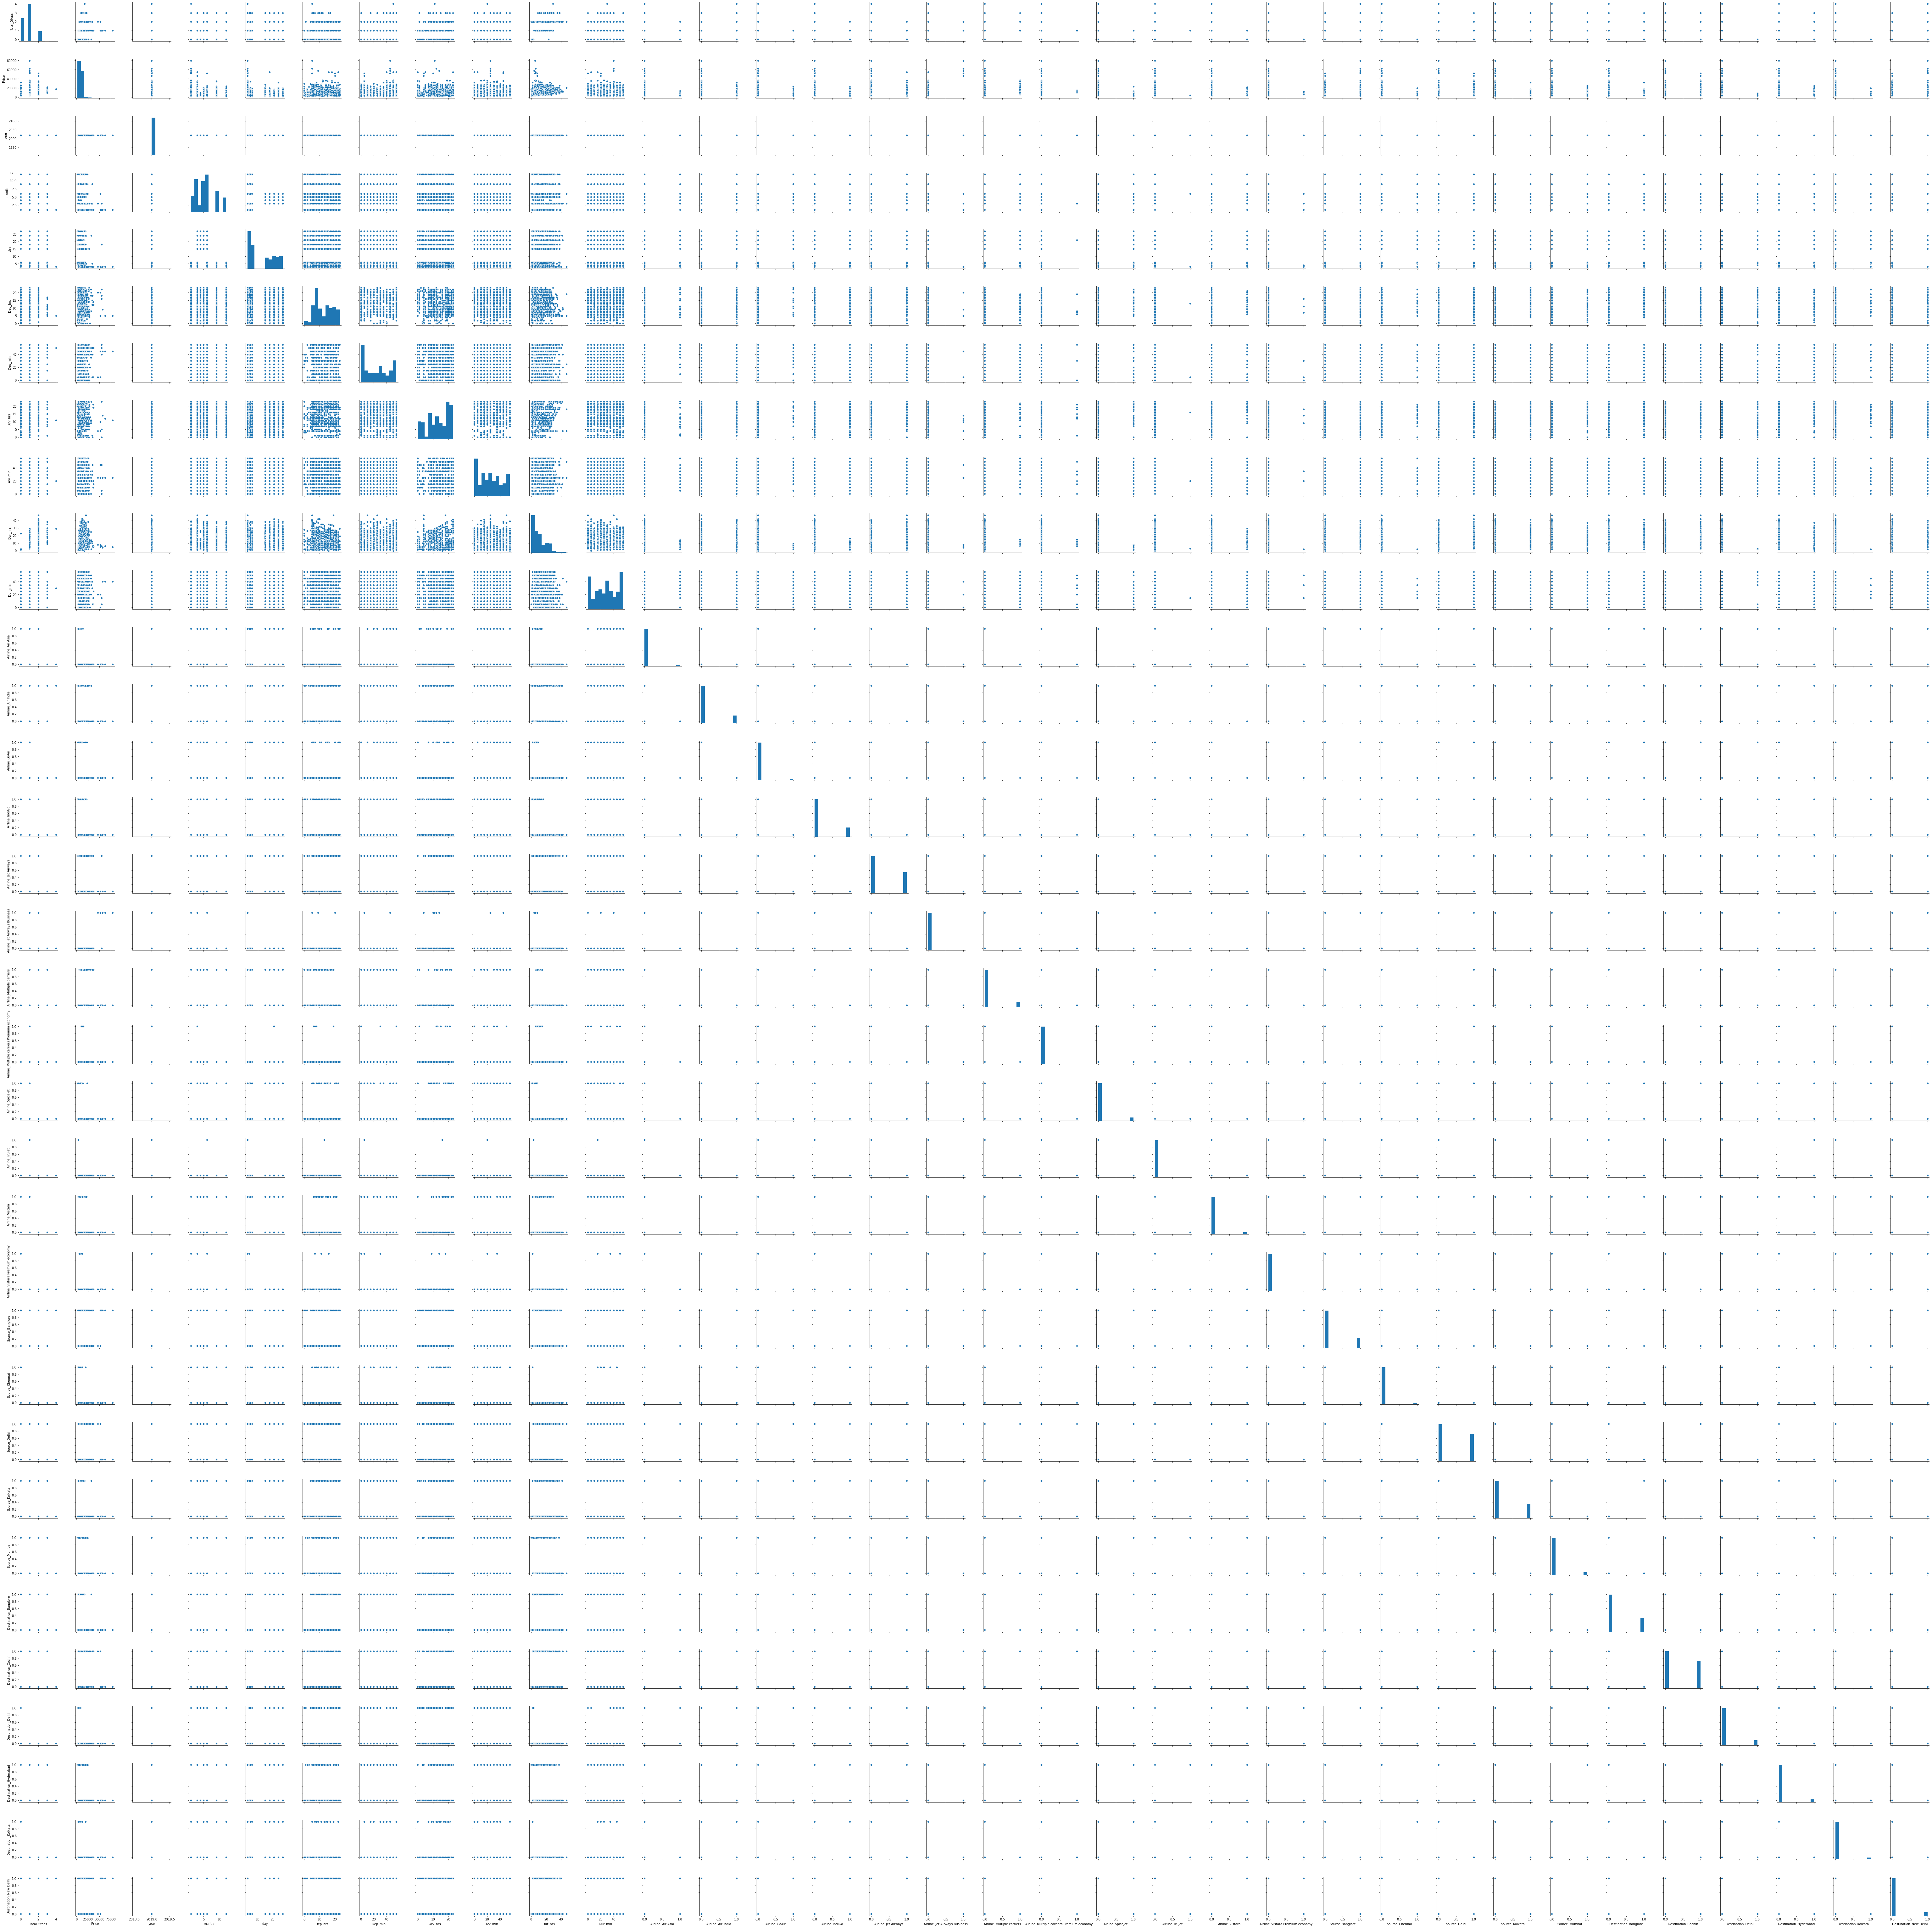

In [72]:
sb.pairplot(df_train)

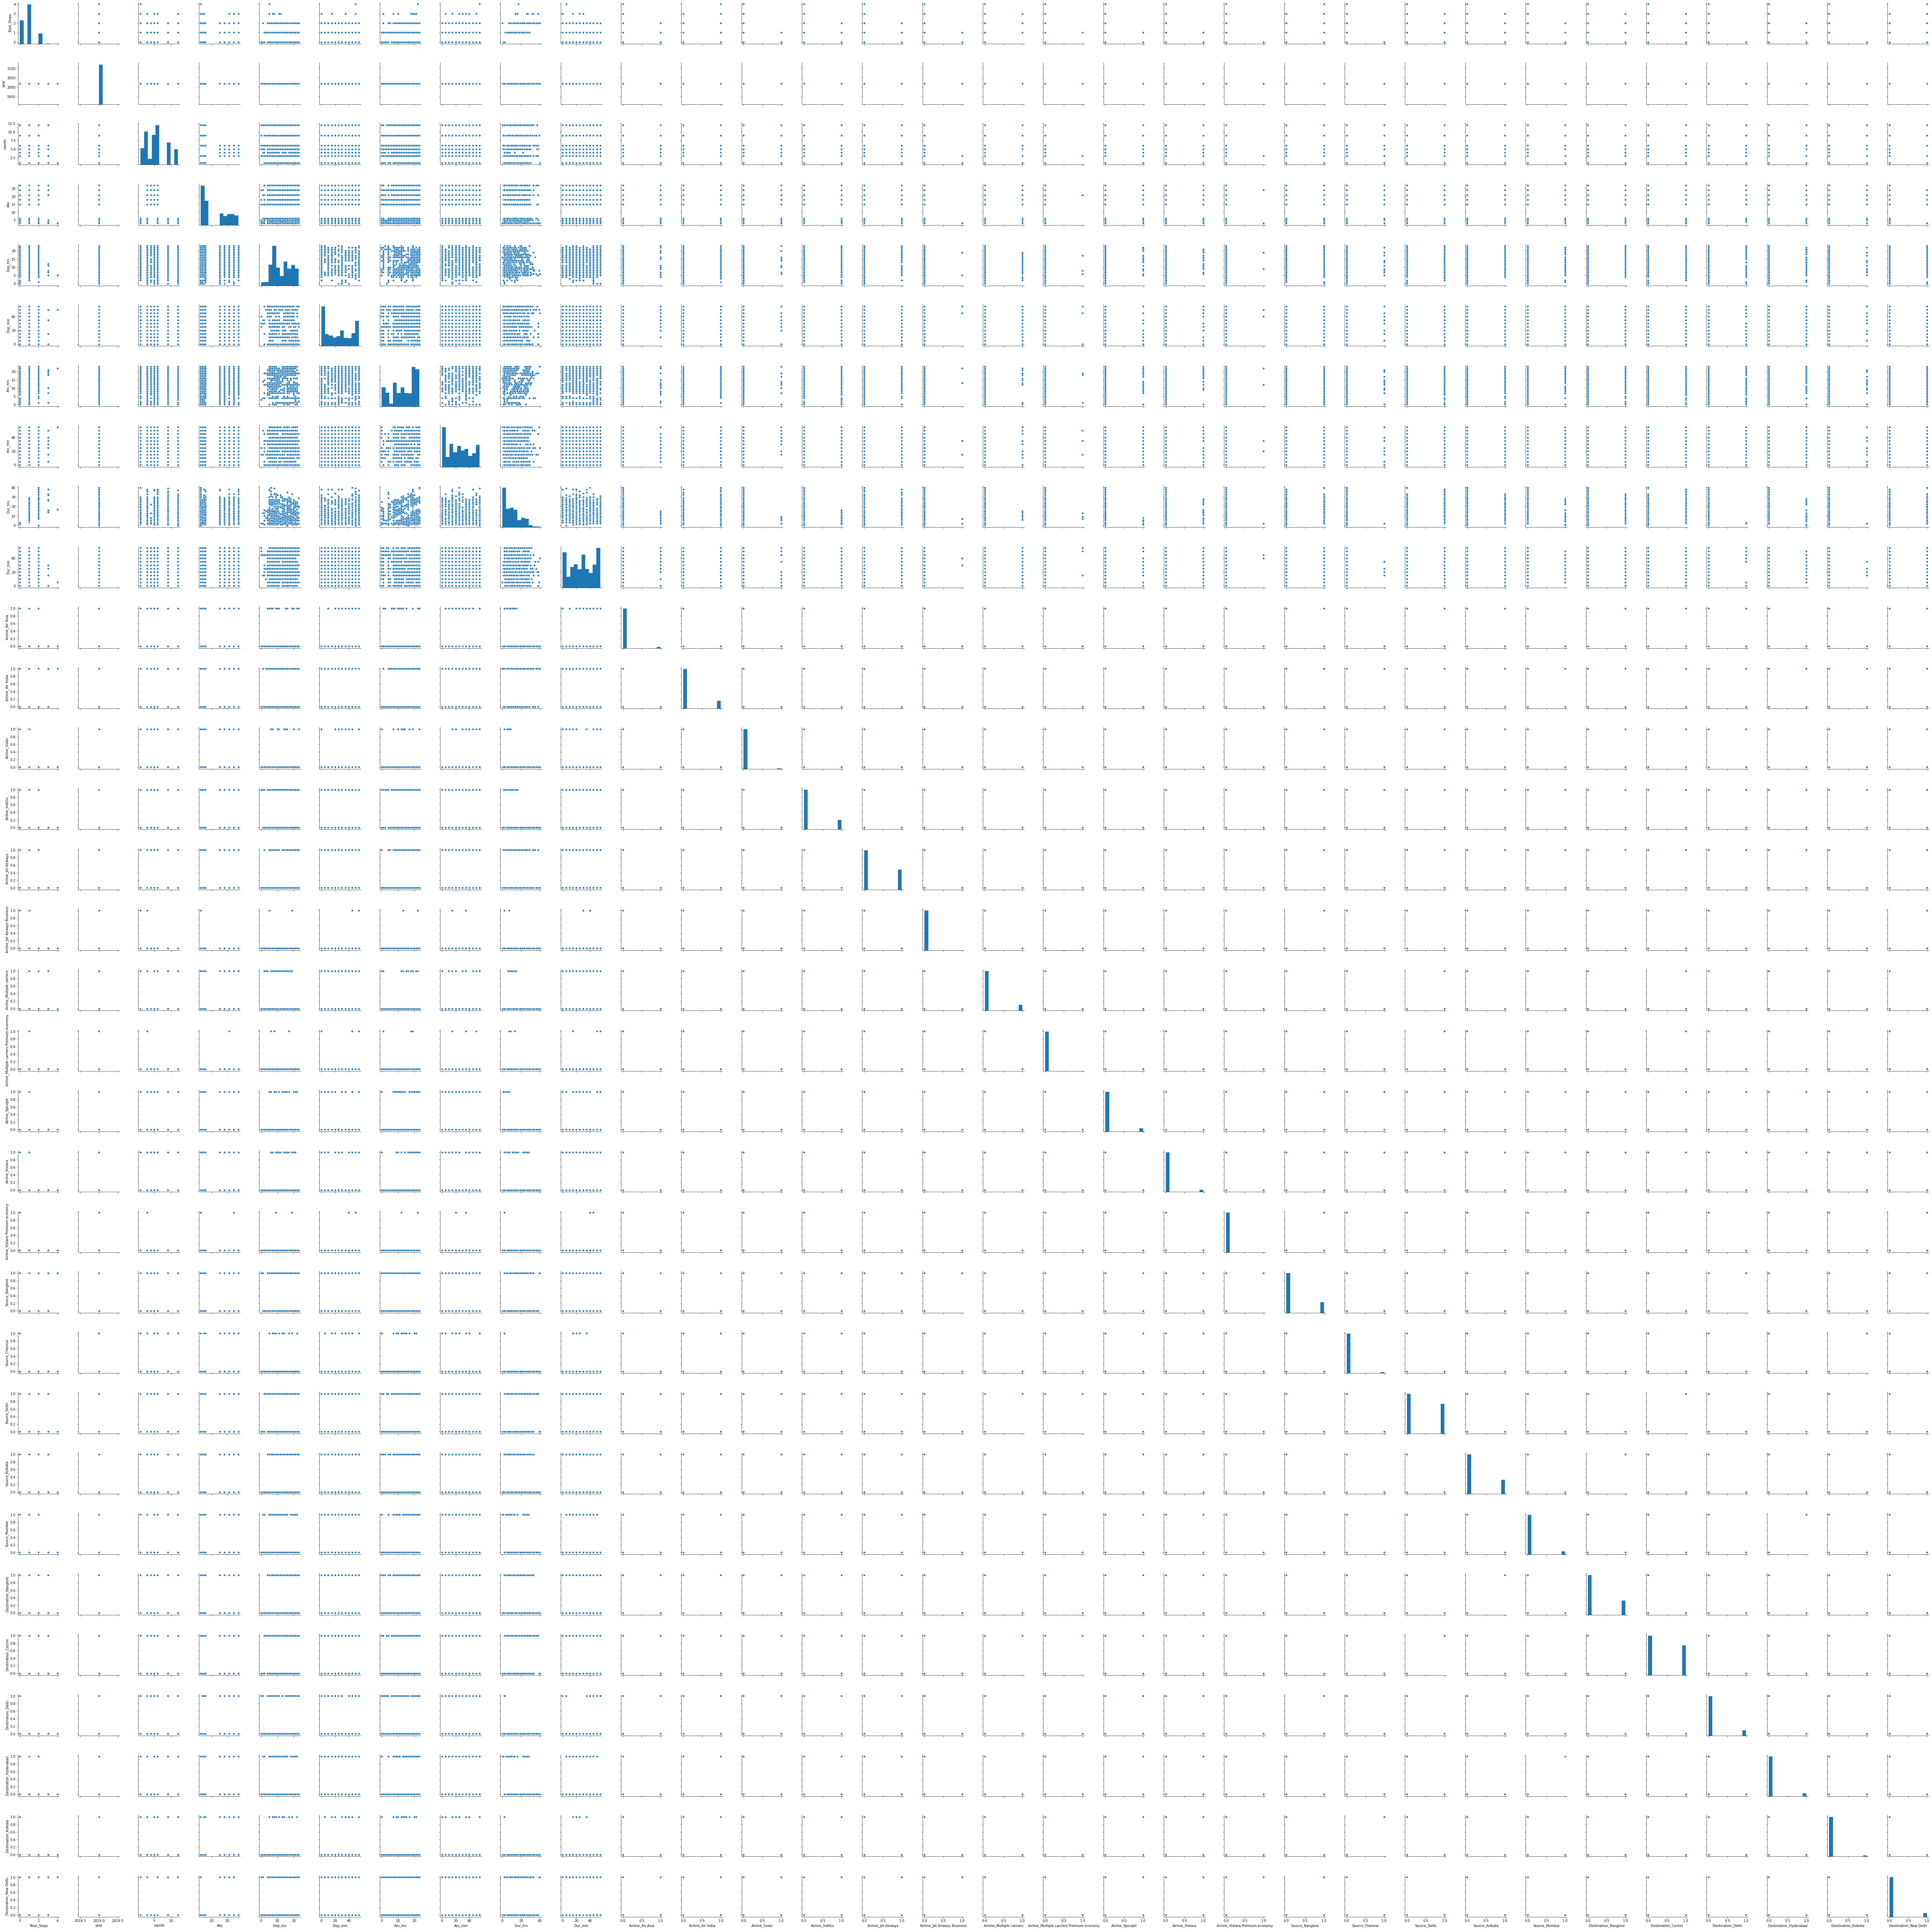

In [73]:
sb.pairplot(df_test)

In [74]:
df_train.shape

(10683, 34)

In [75]:
x = df_train.drop(['Price'], axis=1)

In [76]:
y = df_train['Price']

In [77]:
x.isnull().sum()

Total_Stops                                  0
year                                         0
month                                        0
day                                          0
Dep_hrs                                      0
Dep_min                                      0
Arv_hrs                                      0
Arv_min                                      0
Dur_hrs                                      0
Dur_min                                      0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

In [78]:
x.head()

Total_Stops  year  month  day  Dep_hrs  Dep_min  Arv_hrs  Arv_min  Dur_hrs  \
0          0.0  2019      3   24       22       20        1       10        2   
1          2.0  2019      1    5        5       50       13       15        7   
2          2.0  2019      9    6        9       25        4       25       19   
3          1.0  2019     12    5       18        5       23       30        5   
4          1.0  2019      1    3       16       50       21       35        4   

   Dur_min  ...  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0       50  ...               0             0               0              0   
1       25  ...               0             0               1              0   
2        0  ...               0             1               0              0   
3       25  ...               0             0               1              0   
4       45  ...               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 33 columns]

In [79]:
#Checking skewness 
x.skew()

Total_Stops                                    0.317230
year                                           0.000000
month                                          0.629540
day                                            0.367373
Dep_hrs                                        0.113073
Dep_min                                        0.167029
Arv_hrs                                       -0.369988
Arv_min                                        0.110945
Dur_hrs                                        0.850862
Dur_min                                       -0.090841
Airline_Air Asia                               5.525249
Airline_Air India                              1.815130
Airline_GoAir                                  7.218042
Airline_IndiGo                                 1.562748
Airline_Jet Airways                            0.582095
Airline_Jet Airways Business                  42.166335
Airline_Multiple carriers                      2.461716
Airline_Multiple carriers Premium economy     28

In [80]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()

Total_Stops                                    0.317230
year                                           0.000000
month                                         -0.341975
day                                            0.367373
Dep_hrs                                        0.113073
Dep_min                                        0.167029
Arv_hrs                                       -0.369988
Arv_min                                        0.110945
Dur_hrs                                        0.100645
Dur_min                                       -0.090841
Airline_Air Asia                               5.525249
Airline_Air India                              1.815130
Airline_GoAir                                  7.218042
Airline_IndiGo                                 1.562748
Airline_Jet Airways                            0.582095
Airline_Jet Airways Business                  42.166335
Airline_Multiple carriers                      2.461716
Airline_Multiple carriers Premium economy     28

In [81]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
lr = LinearRegression()
from sklearn.metrics import r2_score

In [83]:
# checking best model
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_train,pred_train))
    print("\n")

At Random State 0 the traning accuracy is :- 0.6303668553860642


At Random State 1 the traning accuracy is :- 0.6100519290111277


At Random State 2 the traning accuracy is :- 0.6179847926697639


At Random State 3 the traning accuracy is :- 0.6144643584789296


At Random State 4 the traning accuracy is :- 0.62082945138465


At Random State 5 the traning accuracy is :- 0.614017977445301


At Random State 6 the traning accuracy is :- 0.6191185969885037


At Random State 7 the traning accuracy is :- 0.430183154121188


At Random State 8 the traning accuracy is :- 0.5507846707631212


At Random State 9 the traning accuracy is :- 0.5981826679541387


At Random State 10 the traning accuracy is :- 0.6297413455045335


At Random State 11 the traning accuracy is :- 0.615766895083582


At Random State 12 the traning accuracy is :- 0.6000423660882677


At Random State 13 the traning accuracy is :- 0.6066410554921063


At Random State 14 the traning accuracy is :- 0.4882975930582507


At Random 

At Random State 125 the traning accuracy is :- 0.6153392442417432


At Random State 126 the traning accuracy is :- 0.5465041858252999


At Random State 127 the traning accuracy is :- 0.6172724536138493


At Random State 128 the traning accuracy is :- 0.613073743976504


At Random State 129 the traning accuracy is :- 0.5470925270879621


At Random State 130 the traning accuracy is :- 0.6217790275278807


At Random State 131 the traning accuracy is :- 0.6102453747521559


At Random State 132 the traning accuracy is :- 0.6139921615401125


At Random State 133 the traning accuracy is :- 0.6200629739487664


At Random State 134 the traning accuracy is :- 0.5703004609783217


At Random State 135 the traning accuracy is :- 0.6145749576186795


At Random State 136 the traning accuracy is :- 0.4865536456149847


At Random State 137 the traning accuracy is :- 0.6222489109068365


At Random State 138 the traning accuracy is :- 0.6245257712784953


At Random State 139 the traning accuracy is :- 0.

At Random State 249 the traning accuracy is :- 0.6206393052303709


At Random State 250 the traning accuracy is :- 0.6298609430509468


At Random State 251 the traning accuracy is :- 0.6297998045836348


At Random State 252 the traning accuracy is :- 0.6153660055413745


At Random State 253 the traning accuracy is :- 0.6235490791044389


At Random State 254 the traning accuracy is :- 0.6089816062834664


At Random State 255 the traning accuracy is :- 0.6185413564952421


At Random State 256 the traning accuracy is :- 0.6035171183065895


At Random State 257 the traning accuracy is :- 0.6113763952090436


At Random State 258 the traning accuracy is :- 0.6294128917490688


At Random State 259 the traning accuracy is :- 0.6226589813448067


At Random State 260 the traning accuracy is :- 0.6236970702222155


At Random State 261 the traning accuracy is :- 0.5733640889459461


At Random State 262 the traning accuracy is :- 0.6239695888562832


At Random State 263 the traning accuracy is :- 0

At Random State 374 the traning accuracy is :- 0.6240912200934821


At Random State 375 the traning accuracy is :- 0.6111919578931388


At Random State 376 the traning accuracy is :- 0.6244570609300479


At Random State 377 the traning accuracy is :- 0.6137143070235722


At Random State 378 the traning accuracy is :- 0.6297727913297548


At Random State 379 the traning accuracy is :- 0.6219327111993691


At Random State 380 the traning accuracy is :- 0.6094273233322063


At Random State 381 the traning accuracy is :- 0.051181990943020006


At Random State 382 the traning accuracy is :- 0.6118574390127034


At Random State 383 the traning accuracy is :- 0.6160388848862537


At Random State 384 the traning accuracy is :- 0.6148470282466775


At Random State 385 the traning accuracy is :- 0.6136467033855196


At Random State 386 the traning accuracy is :- 0.6202755643236753


At Random State 387 the traning accuracy is :- 0.6167111765907956


At Random State 388 the traning accuracy is :-

At Random State 495 the traning accuracy is :- 0.6116858217384809


At Random State 496 the traning accuracy is :- 0.6236922092196961


At Random State 497 the traning accuracy is :- 0.6220938008148494


At Random State 498 the traning accuracy is :- 0.6122412319472164


At Random State 499 the traning accuracy is :- 0.6070907943384023


At Random State 500 the traning accuracy is :- 0.6184067518429012


At Random State 501 the traning accuracy is :- 0.5333695169154604


At Random State 502 the traning accuracy is :- 0.622038247318215


At Random State 503 the traning accuracy is :- 0.4702283177687995


At Random State 504 the traning accuracy is :- 0.6144767795098305


At Random State 505 the traning accuracy is :- 0.6209501887598758


At Random State 506 the traning accuracy is :- 0.6180401699326883


At Random State 507 the traning accuracy is :- 0.6155570497878997


At Random State 508 the traning accuracy is :- 0.6168390220940745


At Random State 509 the traning accuracy is :- 0.

At Random State 618 the traning accuracy is :- 0.615140892001936


At Random State 619 the traning accuracy is :- 0.6146549191286894


At Random State 620 the traning accuracy is :- 0.6148994493618164


At Random State 621 the traning accuracy is :- 0.33721149618617596


At Random State 622 the traning accuracy is :- 0.6177946340765681


At Random State 623 the traning accuracy is :- 0.5675091830333001


At Random State 624 the traning accuracy is :- 0.6057423923883986


At Random State 625 the traning accuracy is :- 0.6185202017840357


At Random State 626 the traning accuracy is :- 0.6179718360687828


At Random State 627 the traning accuracy is :- 0.5965064337655016


At Random State 628 the traning accuracy is :- 0.6047733051970656


At Random State 629 the traning accuracy is :- 0.614078743955078


At Random State 630 the traning accuracy is :- 0.635342491907021


At Random State 631 the traning accuracy is :- 0.575729746955993


At Random State 632 the traning accuracy is :- 0.61

At Random State 744 the traning accuracy is :- 0.3462311004237859


At Random State 745 the traning accuracy is :- 0.6137251518110308


At Random State 746 the traning accuracy is :- 0.6128481535334052


At Random State 747 the traning accuracy is :- 0.6182173743175978


At Random State 748 the traning accuracy is :- 0.6198469204230086


At Random State 749 the traning accuracy is :- 0.4821675290094676


At Random State 750 the traning accuracy is :- 0.6198286002876896


At Random State 751 the traning accuracy is :- 0.6152565705688671


At Random State 752 the traning accuracy is :- -1.0668296598502929


At Random State 753 the traning accuracy is :- 0.6087203789772824


At Random State 754 the traning accuracy is :- 0.6086199780496887


At Random State 755 the traning accuracy is :- 0.6231867293266187


At Random State 756 the traning accuracy is :- 0.6199672553174057


At Random State 757 the traning accuracy is :- -0.2023750257445882


At Random State 758 the traning accuracy is :-

At Random State 866 the traning accuracy is :- 0.6176359358024452


At Random State 867 the traning accuracy is :- 0.6092533361282351


At Random State 868 the traning accuracy is :- 0.6267171552362347


At Random State 869 the traning accuracy is :- 0.6131004885706642


At Random State 870 the traning accuracy is :- 0.6232986542406364


At Random State 871 the traning accuracy is :- 0.518831130044383


At Random State 872 the traning accuracy is :- 0.6166910424327327


At Random State 873 the traning accuracy is :- 0.6197530948571983


At Random State 874 the traning accuracy is :- 0.6043266440452872


At Random State 875 the traning accuracy is :- 0.620697684410962


At Random State 876 the traning accuracy is :- 0.614289726977123


At Random State 877 the traning accuracy is :- 0.6257256386894248


At Random State 878 the traning accuracy is :- 0.6224878731665656


At Random State 879 the traning accuracy is :- 0.6156264743867579


At Random State 880 the traning accuracy is :- 0.62

At Random State 990 the traning accuracy is :- 0.6027395449088173


At Random State 991 the traning accuracy is :- 0.6183742224297966


At Random State 992 the traning accuracy is :- 0.6270991852804197


At Random State 993 the traning accuracy is :- 0.6212255335629571


At Random State 994 the traning accuracy is :- 0.4831160632735785


At Random State 995 the traning accuracy is :- 0.40516894376151613


At Random State 996 the traning accuracy is :- 0.6214325199232649


At Random State 997 the traning accuracy is :- 0.6197445568240938


At Random State 998 the traning accuracy is :- -1.5115593481535816


At Random State 999 the traning accuracy is :- 0.6158653513475044




In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [85]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
pred_test = lr.predict(x_test)

In [87]:
print(r2_score(y_test,pred_test))

0.6099961637701324


In [88]:
Train_accu = r2_score(y_train,pred_train)
Test_accu = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("At score:",j,"the cv score:",cv_mean,"and accu for train",Train_accu,"and accu for test",Test_accu)
    print("\n")

At score: 2 the cv score: 0.5247814103631945 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 3 the cv score: 0.6135558050402958 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 4 the cv score: 0.599160805368868 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 5 the cv score: 0.5371626477500462 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 6 the cv score: -8869853391352599.0 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 7 the cv score: 0.6066072704482932 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 8 the cv score: -0.05114190982408989 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324


At score: 9 the cv score: -85797259615205.69 and accu for train -0.5839443271213591 and accu for test 0.6099961637701324




In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

dts = r2_score(y_test,preddt)
print("dt score",dts*100)

dts_score = cross_val_score(dt,x,y,cv = 3)
dtc_score = dts_score.mean()
print("cross val score",dtc_score*100)

dt score 70.5347376699951
cross val score 67.30138506264824


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

In [92]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)

rfs = r2_score(y_test,predrf)
print('R2 Score',rfs*100)

R2 Score 79.51888982576038


In [93]:
rfs_score = cross_val_score(rf,x,y,cv = 3)
rfc_score = rfs_score.mean()
print("cross val score",rfc_score*100)

cross val score 79.12875198265019


In [94]:
#Saving Model
import pickle
filename = 'Flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))

In [95]:
loaded_model = pickle.load(open('Flightprice.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7951888982576039
